In [1]:
library(raster)

Loading required package: sp



In [2]:
rr = raster("uk_tmax_BCC-CSM2-MR_ssp370_2081-2100.nc")

Loading required namespace: ncdf4



In [3]:
rr

class      : RasterLayer 
band       : 1  (of  12  bands)
dimensions : 68, 77, 5236  (nrow, ncol, ncell)
resolution : 0.1666667, 0.1666667  (x, y)
extent     : -10.66667, 2.166667, 49.66667, 61  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : uk_tmax_BCC-CSM2-MR_ssp370_2081-2100.nc 
names      : variable 
values     : 5.36875, 13.1  (min, max)
z-value    : 1 
zvar       : variable 


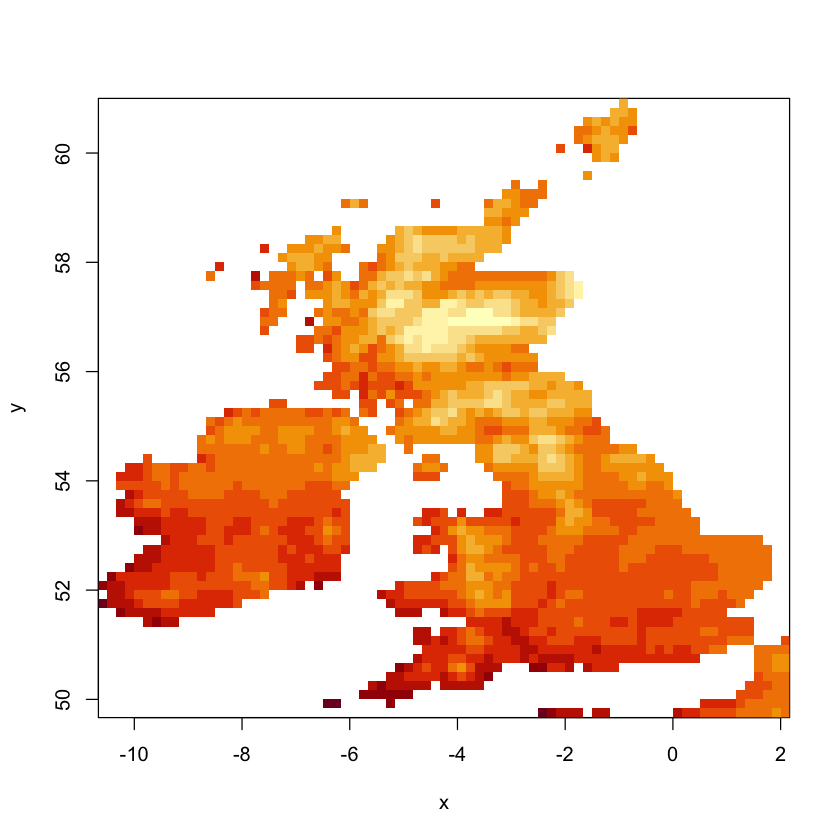

In [4]:
image(rr)

In [8]:
df = as.data.frame(rr, xy=T)

In [9]:
head(df)

,x,y,variable
,<dbl>,<dbl>,<dbl>
1,-10.583333,60.91667,NA
2,-10.416667,60.91667,NA
3,-10.250000,60.91667,NA
4,-10.083333,60.91667,NA
5,-9.916667,60.91667,NA
6,-9.750000,60.91667,NA


In [66]:
valid = !is.na(df$variable)

In [67]:
allvalues = matrix(NA, 0, sum(valid))

In [25]:
dim(allvalues)

[1]    0 2051

In [12]:
for (filename in list.files(".", pattern="\\.nc"))
    print(filename)

[1] "uk_tmax_BCC-CSM2-MR_ssp370_2081-2100.nc"
[1] "uk_tmax_CanESM5_ssp370_2081-2100.nc"
[1] "uk_tmax_CNRM-CM6-1_ssp370_2081-2100.nc"
[1] "uk_tmax_CNRM-ESM2-1_ssp370_2081-2100.nc"
[1] "uk_tmax_GFDL-ESM4_ssp370_2081-2100.nc"
[1] "uk_tmax_IPSL-CM6A-LR_ssp370_2081-2100.nc"
[1] "uk_tmax_MIROC-ES2L_ssp370_2081-2100.nc"
[1] "uk_tmax_MIROC6_ssp370_2081-2100.nc"
[1] "uk_tmax_MRI-ESM2-0_ssp370_2081-2100.nc"


In [68]:
allvalues = matrix(NA, 0, sum(!is.na(df$variable)))
obsinfo = data.frame()
for (filename in list.files(".", pattern="\\.nc")) {
    for (month in 1:12) {
        rr = raster(filename, band=month)
        values = as.data.frame(rr, xy=T)
        allvalues = rbind(allvalues, values$variable[valid])
        obsinfo = rbind(obsinfo, data.frame(filename, month))
    }
}

In [69]:
dim(allvalues)

[1]  108 2051

In [74]:
df$mmm[valid] = colMeans(allvalues)

In [75]:
library(ggplot2)

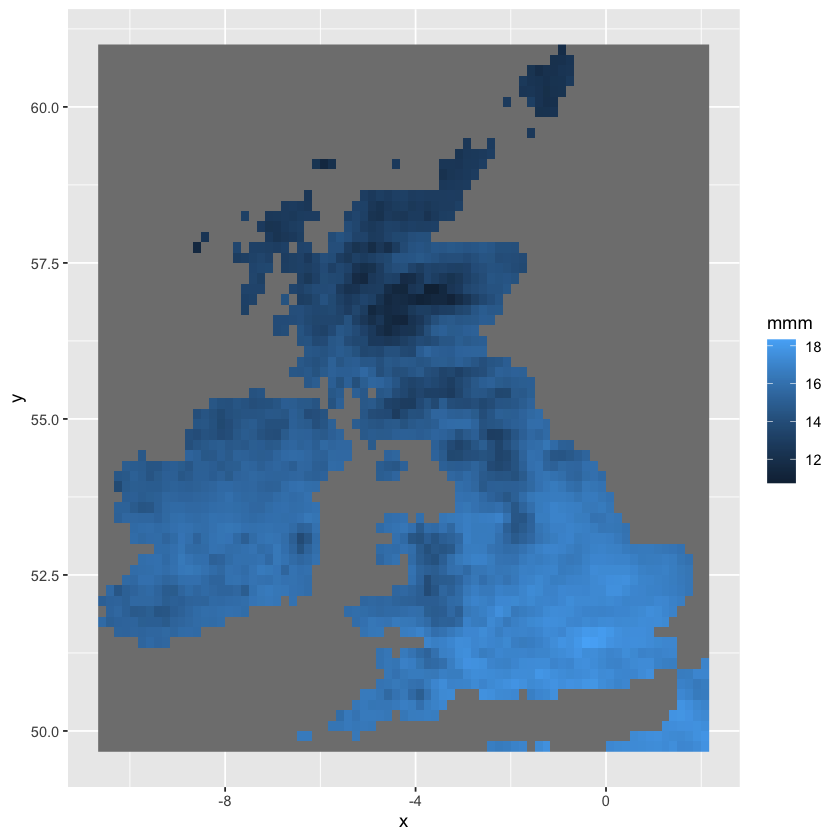

In [76]:
ggplot(df, aes(x, y, fill=mmm)) + geom_raster()

In [77]:
df$msd[valid] = apply(allvalues, 2, sd)

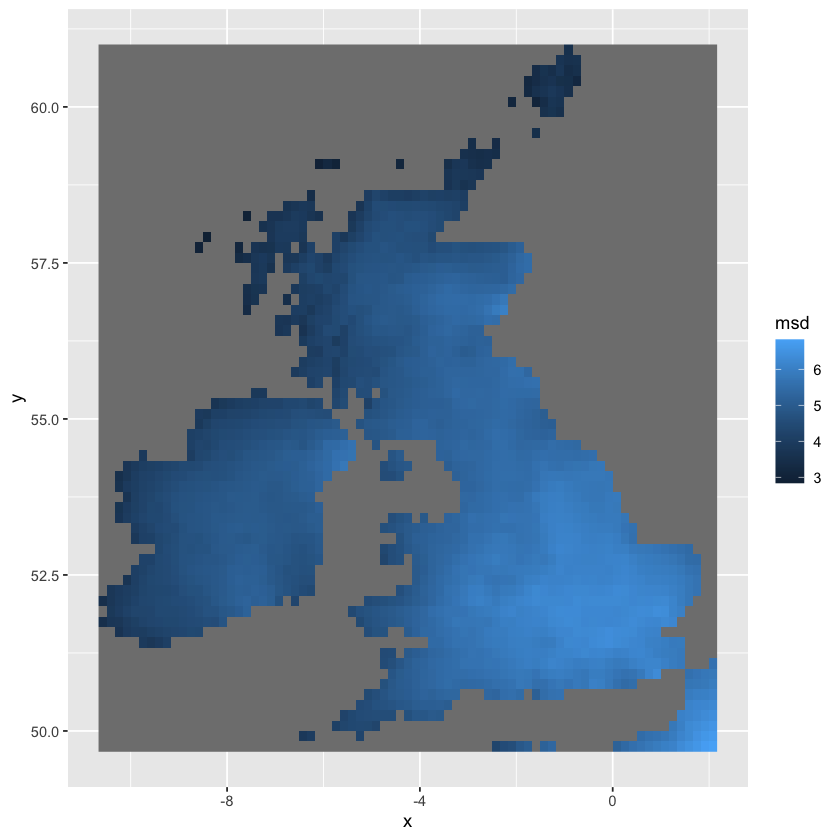

In [78]:
ggplot(df, aes(x, y, fill=msd)) + geom_raster()

In [31]:
pca = prcomp(allvalues, center=F, scale=F)

In [33]:
summary(pca)

Importance of components:
                            PC1      PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     734.8138 27.13702 7.91947 7.3727 5.39866 3.49278 2.89851
Proportion of Variance   0.9983  0.00136 0.00012 0.0001 0.00005 0.00002 0.00002
Cumulative Proportion    0.9983  0.99964 0.99976 0.9999 0.99991 0.99993 0.99995
                           PC8     PC9    PC10  PC11  PC12  PC13  PC14  PC15
Standard deviation     2.33208 2.10075 1.72508 1.492 1.354 1.317 1.185 1.047
Proportion of Variance 0.00001 0.00001 0.00001 0.000 0.000 0.000 0.000 0.000
Cumulative Proportion  0.99996 0.99997 0.99997 1.000 1.000 1.000 1.000 1.000
                        PC16   PC17   PC18   PC19   PC20   PC21   PC22   PC23
Standard deviation     0.986 0.9078 0.8745 0.7879 0.7379 0.6372 0.6215 0.5593
Proportion of Variance 0.000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
Cumulative Proportion  1.000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000
                         PC24   PC

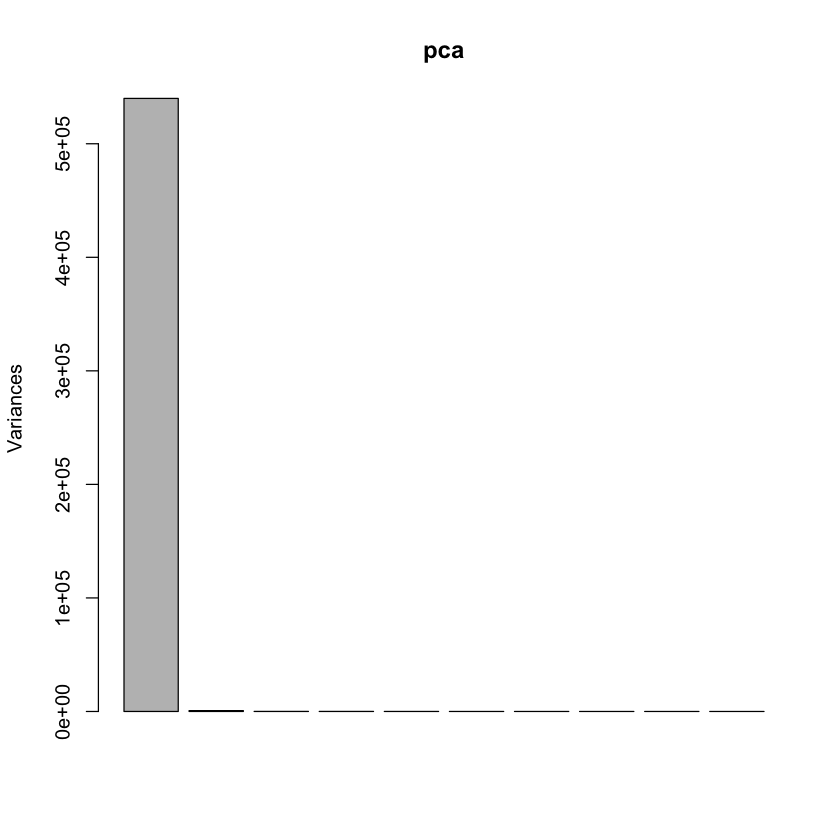

In [36]:
plot(pca)

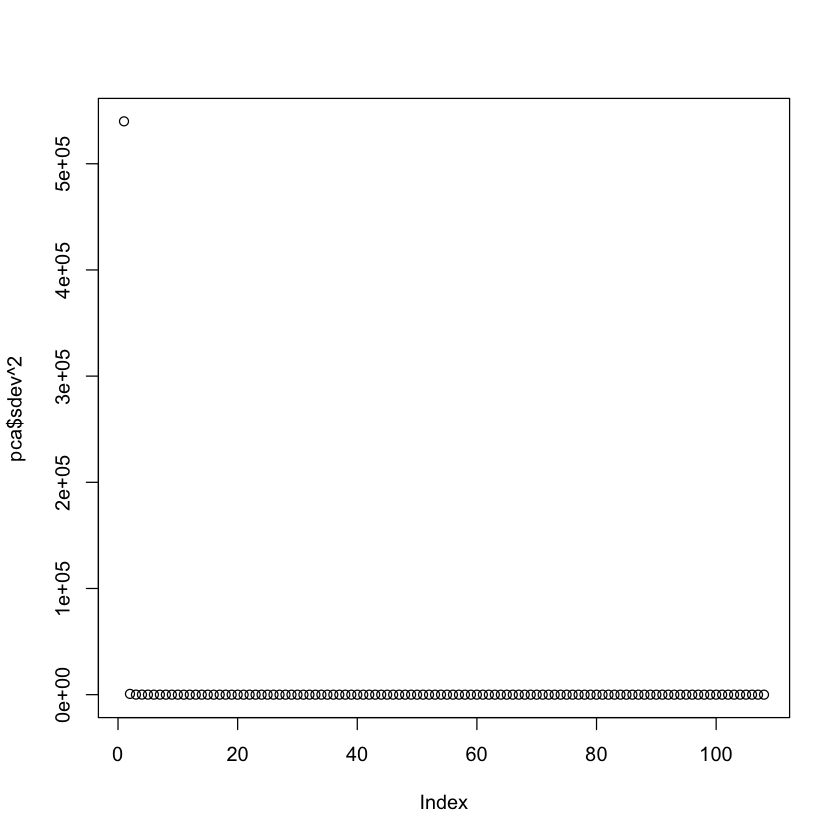

In [58]:
plot(pca$sdev^2)

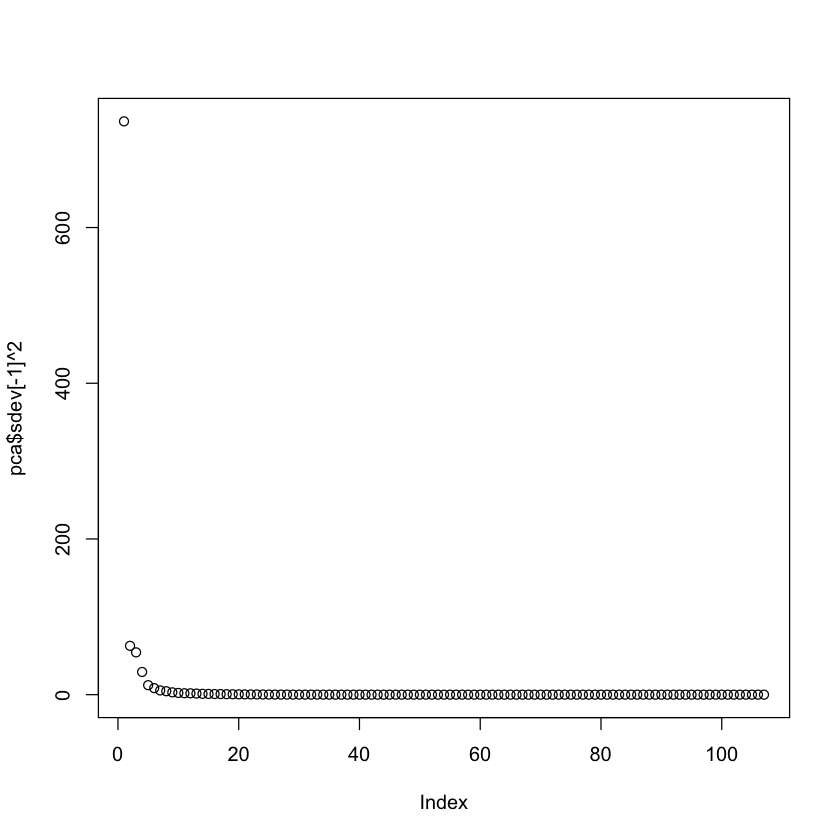

In [59]:
plot(pca$sdev[-1]^2)

In [38]:
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [48]:
pca$rotation

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
-0.01681697,-0.02382915,0.03234899,0.03511240,0.012701813,0.03859451,0.031426951,-0.026156988,0.009788444,0.0085144666,⋯,-0.0125250138,-0.0008006599,0.0375719062,0.0405265439,0.028446748,-0.0407808400,-0.032269190,-0.064005290,0.034732080,0.031390880
-0.01728076,-0.02082552,0.03086538,0.02998653,0.022083041,0.04047509,0.027376240,-0.021636085,0.011139410,0.0227204671,⋯,0.0239840622,-0.0291611342,-0.0151752117,-0.0004695982,-0.019589775,0.0034210260,-0.020549203,-0.022609179,0.011449800,0.002633315
-0.01723162,-0.02631889,0.03179064,0.03093031,0.018898887,0.04098401,0.031007157,-0.014260661,0.008550302,0.0230139331,⋯,0.0063457578,0.0351709869,0.0004159704,0.0269398370,-0.009491392,-0.0005810056,-0.034876223,0.015423620,-0.047751589,0.033262793
-0.01755402,-0.02732005,0.02716247,0.02908861,0.018075870,0.03907034,0.038105774,-0.011518078,0.005295898,0.0141990374,⋯,0.0194966808,0.0554788464,0.0017582821,0.0031519155,0.059422067,-0.0182795437,0.016255917,0.008197421,0.034788892,0.027968153
-0.01736943,-0.03736096,0.03456703,0.03187173,0.010496998,0.04146227,0.023366152,-0.009878355,0.018106568,-0.0070164688,⋯,-0.0278635583,0.0219863142,0.0259663967,-0.0525337378,-0.045195592,0.0500476164,-0.004491987,0.002740227,0.019478481,-0.007259749
-0.01688711,-0.02092121,0.03658167,0.03731078,0.016682464,0.03643511,0.021947356,-0.027427579,0.007598489,0.0034390777,⋯,-0.0485258008,-0.0177617714,0.0054997618,-0.0090024189,-0.033651785,0.0183452280,-0.020214880,-0.026241606,-0.001911499,0.025469359
-0.01721099,-0.03037518,0.03617682,0.03316053,0.015781273,0.03972452,0.021747409,-0.015865071,0.009193224,0.0058440106,⋯,0.0279307769,-0.0422567960,0.0060534232,-0.0103444489,-0.006589035,0.0136730117,0.036443907,0.031760972,0.001624281,0.018272097
-0.01734942,-0.01847172,0.03113342,0.03049063,0.026382821,0.03662483,0.021850353,-0.021526374,0.005708618,0.0223193936,⋯,-0.0033088436,-0.0185308342,0.0023807842,0.0294836737,-0.001865490,-0.0025914601,0.012824816,0.026559970,-0.017116547,0.017480909
-0.01748550,-0.03703387,0.03538698,0.02920532,0.016751293,0.04413422,0.027792885,-0.002867148,0.001378319,0.0188001320,⋯,0.0066754857,0.0006232226,-0.0325483903,-0.0123951143,-0.010156396,0.0438042479,-0.024436341,0.014647997,0.004411531,-0.045472563
-0.01761224,-0.03189950,0.03285397,0.02663578,0.024933478,0.03763178,0.027853507,-0.003467663,-0.002271506,0.0099473147,⋯,0.0234049247,0.0310171771,0.0210213836,0.0139641724,0.065545501,0.0001916374,0.022244845,0.021117400,0.005883339,-0.015666804


In [49]:
pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
-434.8298,-37.91725467,-2.2836488,4.06470169,-5.8307455,3.91293256,-0.366845048,3.16653239,-0.07899586,2.60232845,⋯,-0.016871103,-0.050298535,-0.011595075,-0.005019714,-0.0094293440,-0.0047504318,-0.044387384,-0.007210458,-3.068601e-02,0.044121998
-439.6521,-33.74282913,-8.9575020,-0.30020482,2.0969789,6.11999713,-2.981778333,0.07313785,-0.64012818,3.29954933,⋯,0.024230885,0.008316634,-0.026346713,0.018260238,0.0353530043,0.0006734376,0.034249700,-0.007902295,-3.214060e-02,0.032834244
-538.8138,-9.97852063,-8.1522842,-12.33543830,2.6473674,5.28364008,-4.711961349,1.56681768,0.31682914,-0.34266809,⋯,-0.014390439,0.016154547,-0.001852053,0.009591232,-0.0400849892,0.0160602843,-0.032175757,-0.061352146,-7.988927e-03,0.007691937
-630.6641,0.01286685,-11.5237987,-4.95239045,3.3385115,-0.10445322,-1.030685424,0.17829991,-2.82352875,0.40107523,⋯,-0.013184554,-0.018341858,0.026192464,0.011684723,-0.0168599052,-0.0406142546,0.058208684,0.080070241,2.656948e-02,-0.020262937
-783.3492,16.41197333,-8.8875232,-0.89568030,-0.3400501,-2.90959889,3.389230687,3.95160511,-2.80410523,-1.27713966,⋯,0.015370852,-0.005101340,0.023322760,-0.002595805,0.0400661684,0.0011385659,-0.043271120,-0.014540961,1.714335e-02,-0.023455036
-917.9199,32.07765479,-5.6180426,-6.69668946,-12.1786515,1.93600189,-3.943297607,2.38384933,-2.40288111,-0.95096933,⋯,0.006692343,0.024013749,0.003009803,0.006144843,-0.0179015507,0.0056235500,0.007819170,-0.020899834,7.551383e-03,0.001498820
-1023.2639,37.03819393,-4.7512732,-8.95126733,-15.4672033,5.03417782,-5.356444227,2.08791478,-5.79193180,-1.44073628,⋯,0.013933066,-0.002929074,-0.019526931,-0.004316342,0.0151216692,-0.0155736258,-0.008379548,0.011353200,1.414038e-03,0.017031612
-1009.2804,24.86778202,9.9113894,-8.25779164,-4.2834662,3.29841302,-0.653212879,3.27378757,-2.83898303,-1.59586505,⋯,-0.032766939,-0.011325685,0.015328535,0.005020885,-0.0097387303,0.0266213915,0.015228158,0.008753635,-3.401113e-03,-0.033594661
-882.1761,6.03514387,11.7865268,-11.50435042,1.5970923,-1.57218112,-1.624072520,2.91802055,-5.46371529,-1.98984401,⋯,0.013671393,0.014794261,-0.014951486,-0.017541201,0.0059197973,0.0019524073,0.003516406,0.002329741,-1.999466e-02,0.020460723
-702.2259,-19.03474266,6.9568396,-2.74149970,3.4644151,-3.64144466,-3.678791003,-1.25476639,0.42658521,-0.08231663,⋯,-0.003889723,0.001599976,-0.019256624,0.002469577,-0.0469940673,-0.0160264168,-0.028639348,-0.045616326,1.819094e-02,0.032001728


In [79]:
df$pc1[valid] = pca$rotation[, 1]

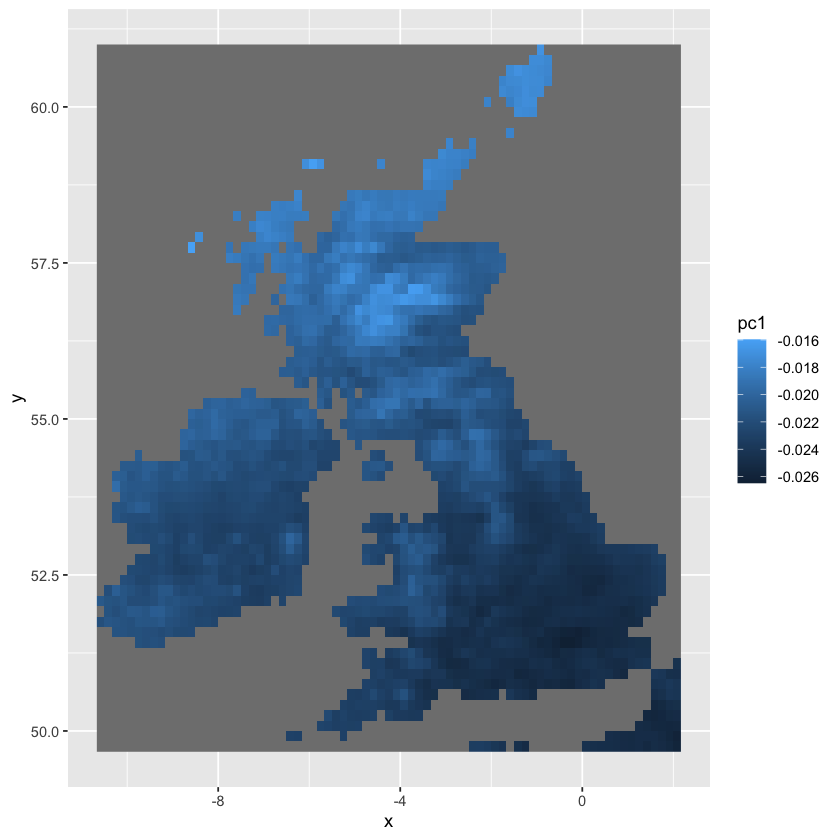

In [80]:
ggplot(df, aes(x, y, fill=pc1)) + geom_raster()

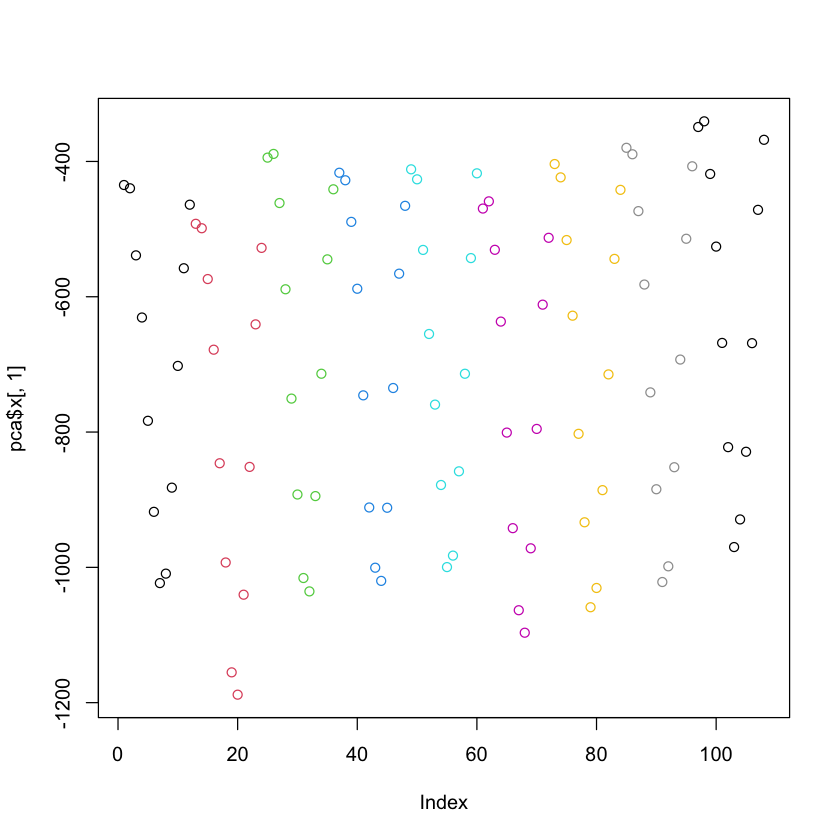

In [81]:
plot(pca$x[, 1], col=factor(obsinfo$filename))

In [82]:
df$pc2[valid] = pca$rotation[, 2]

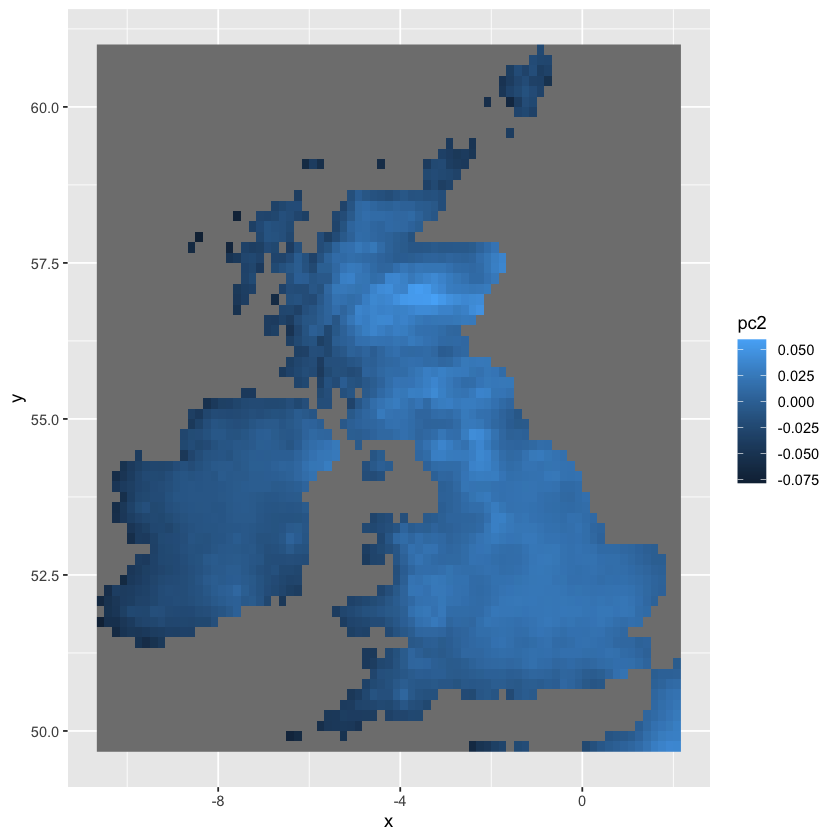

In [83]:
ggplot(df, aes(x, y, fill=pc2)) + geom_raster()

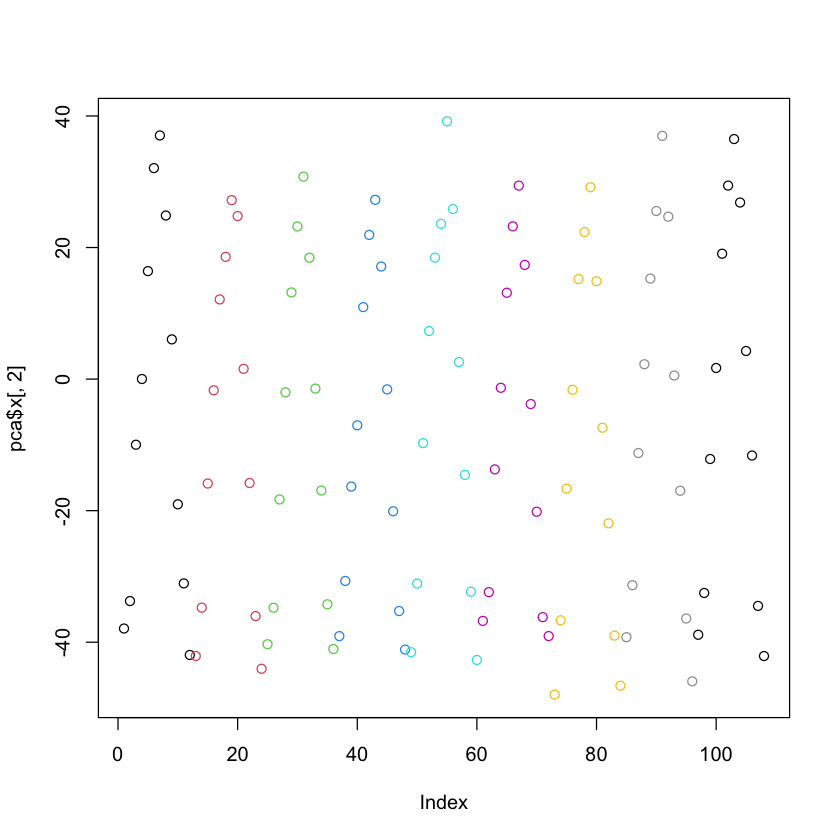

In [84]:
plot(pca$x[, 2], col=factor(obsinfo$filename))

In [105]:
sd(allvalues)

[1] 5.317358

In [114]:
predvalues = pca$x[, 1, drop=F] %*% t(pca$rotation[, 1, drop=F])

In [115]:
dim(predvalues)

[1]  108 2051

In [116]:
error = allvalues - predvalues

In [117]:
sd(error)

[1] 0.6705743

In [118]:
predvalues = pca$x[, 1:2] %*% t(pca$rotation[, 1:2])

In [119]:
error = allvalues - predvalues

In [120]:
sd(error)

[1] 0.3064976

In [122]:
df$pc3[valid] = pca$rotation[, 3]

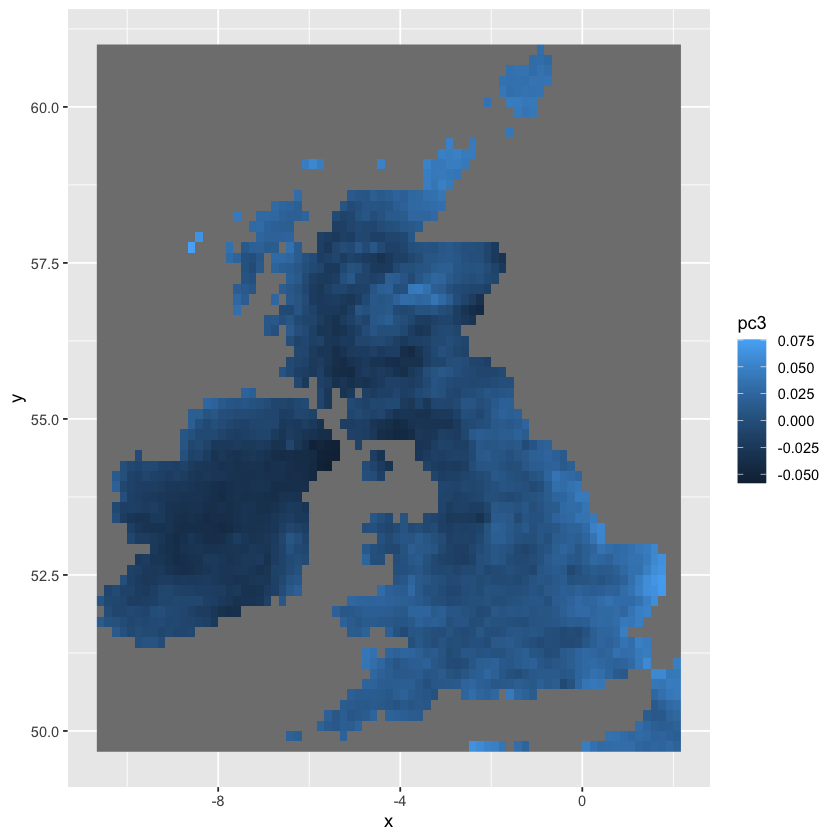

In [123]:
ggplot(df, aes(x, y, fill=pc3)) + geom_raster()

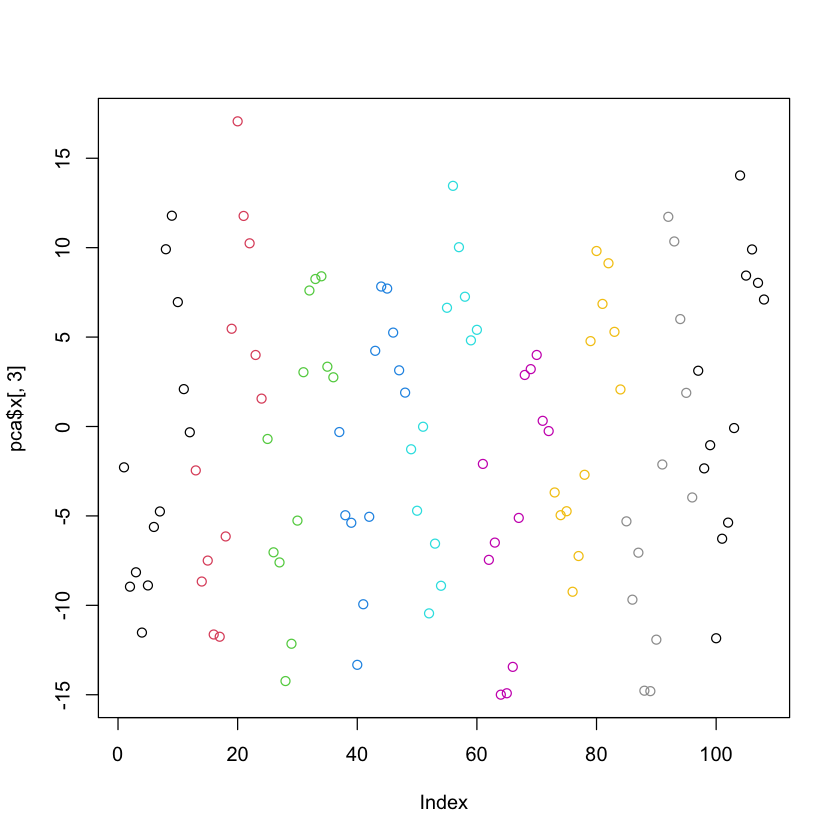

In [121]:
plot(pca$x[, 3], col=factor(obsinfo$filename))

In [124]:
pca = prcomp(allvalues, center=T, scale=F)

In [125]:
df$pc1[valid] = pca$rotation[, 1]

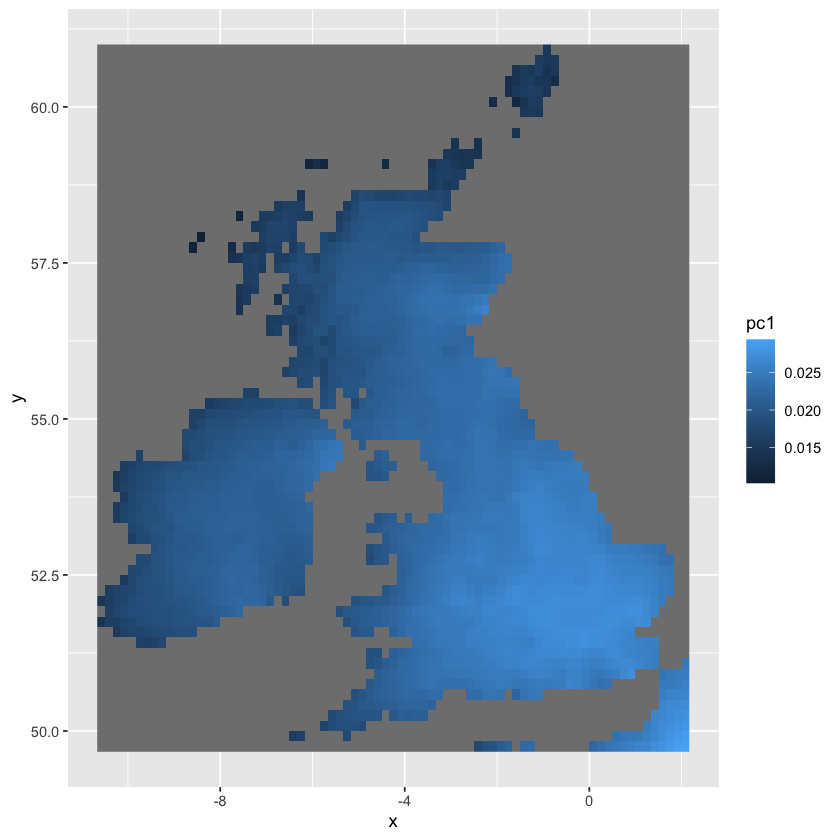

In [126]:
ggplot(df, aes(x, y, fill=pc1)) + geom_raster()

In [127]:
pca = prcomp(allvalues, center=T, scale=T)

In [128]:
df$pc1[valid] = pca$rotation[, 1]

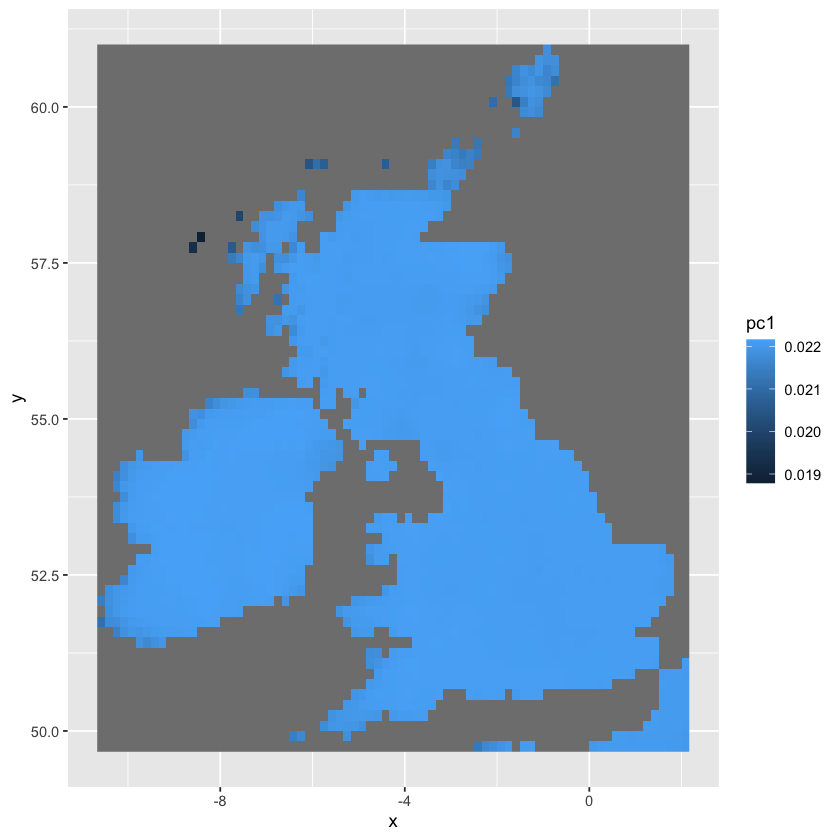

In [129]:
ggplot(df, aes(x, y, fill=pc1)) + geom_raster()

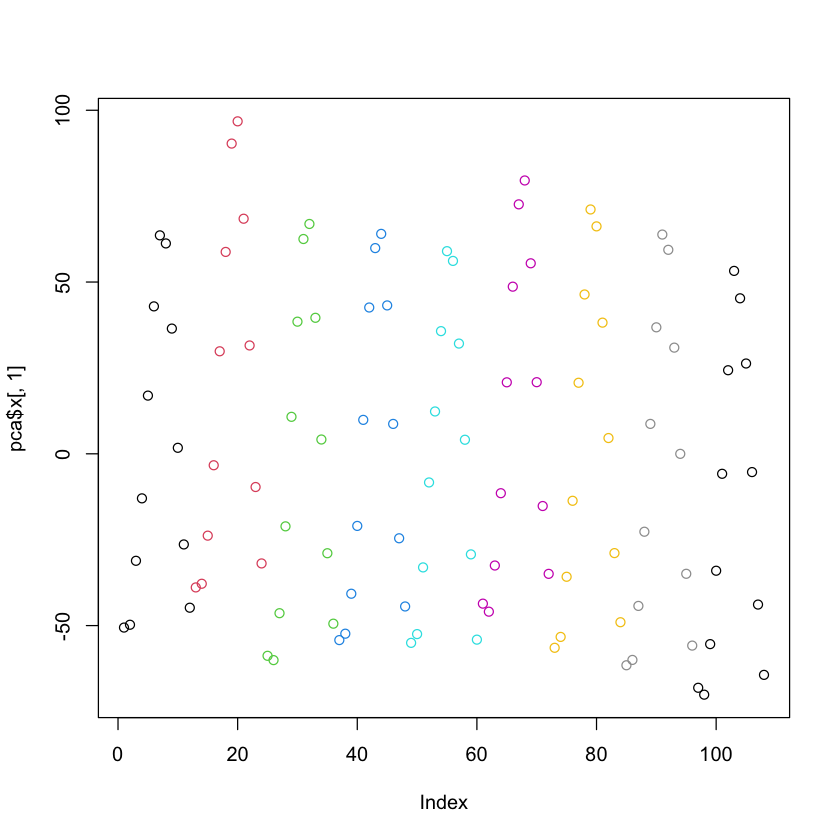

In [132]:
plot(pca$x[, 1], col=factor(obsinfo$filename))